In [1]:
import pandas as pd
import numpy as np
#실제 그래프를 그릴 수 있는 서브 함수
import matplotlib.pyplot as plt
import seaborn as sns

#경고표시 생략(일시적으로 생략하는게 좋음) 
import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 지정 
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

### 서울시 공공 자전거 대여 분석

+ 서울시 자전거 분석(따릉이) SeoulBikeData.csv
  (1) 시간대별로 평균 몇대가 대여되었을까?
  
  (2) 위의 결과를 시각화
  
  (3) 2016년 1월 1일은 금요일이었다. Date 변수에서 요일을 뽑아서 파생변수만들기 - 전처리(요일을           만들기)
  
  (4) 요일별로 평균 몇 대가 대여되었을까?
  
  (5) 위의 결과를 시각화
  
  (6) 요일별로 시간대별 그래프로 시각화
  
  (7) 선형분석 
    - 각 변수들이 자전거 대여 횟수와 관련이 있는가? 
    - 온도에 따라 몇대의 자전거가 대여 될까? (e.g. 온도가 23도일 때 자전거 대여 횟수는 998대이다.)

#### 1. 데이터준비

In [50]:
bike = pd.read_csv('data/SeoulBikeData.csv')
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [51]:
# 변수 살펴보기
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [52]:
##### 시간대별로 평균 몇 대가 대여되었을까? 
bike.groupby('Hour')['Rented Bike Count'].mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

Text(15.5, 150, '퇴근대')

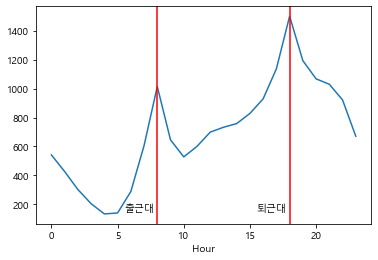

In [53]:
##### 시각화 
# 기본틀
bike.groupby('Hour')['Rented Bike Count'].mean().plot()

plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')
plt.text(5.5,150,'출근대')
plt.text(15.5,150,'퇴근대')

In [54]:
##### (3) 2016년 1월 1일은 금요일이었다. Date 변수에서 요일을 뽑아서 파생변수만들기 - 전처리(요일을 만들기)
#2016년 1월 1일은 금요일 이라는 기준값이 있으니 빼서 7로 나누어 나머지만 
bike.loc[:,'Date'] = pd.to_datetime(bike['Date'],format='%d/%m/%Y') # 날짜 순서가 다르면 포맷으로 재설정 해줘야함. 
diff=(bike['Date'] - pd.to_datetime('2016-01-01')).astype(str)
### 날짜의 숫자만 필요하기 때문에 스플릿으로 나눠줘야함. 그러기 위해서는 문자로 바꾼다음 나누고 숫자만 가져온다음 다시 숫자로 변경
#expand=True --> 700 days 이렇게 하나짜리를 두개로 확장해라라는 뜻 
diff_num=diff.str.split(' ',expand=True)[0].astype(int)
diff_num

def weekdays(x):
    if x % 7 ==0:
        return '금요일'
    elif x %7 ==1:
        return '토요일'
    elif x %7 ==2:
        return '일요일'
    elif x %7 ==3:
        return '월요일'
    elif x %7 ==4:
        return '화요일'
    elif x %7 ==5:
        return '수요일'
    elif x %7 ==6:
        return '목요일'

#파생변수 만들기    
bike['weekdays'] = diff_num.apply(weekdays)
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,금요일
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,금요일


In [55]:
#간단히 해보기 
bike['weekdays2']=((pd.to_datetime(bike['Date'],format='%d/%m/%Y') -pd.to_datetime('2016-01-01')).dt.days)%7
bike['weekdays2'].value_counts()
bike['weekdays2']=bike['weekdays2'].map({0:'금',1:'토',2:'일',3:'월',4:'화',5:'수',6:'목'})
bike.head(5)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays,weekdays2
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일,금
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일,금
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일,금
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일,금
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일,금


In [60]:
#무작위로 확인할때는 sample
#head는 무조건 앞에것만 가져오니 동일한 요일의 데이터만 보일 수가 있음. 
bike.sample(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays,weekdays2
2659,2018-03-21,402,19,2.0,81,0.7,2000,-0.9,0.00,0.0,0.0,Spring,No Holiday,Yes,수요일,수
7049,2018-09-20,1290,17,19.3,76,2.1,2000,14.9,0.21,0.0,0.0,Autumn,No Holiday,Yes,목요일,목
3724,2018-05-05,252,4,12.1,51,1.6,1939,2.2,0.00,0.0,0.0,Spring,No Holiday,Yes,토요일,토
6406,2018-08-24,1202,22,23.5,79,2.9,1860,19.6,0.00,0.0,0.0,Summer,No Holiday,Yes,금요일,금
7848,2018-10-24,708,0,10.8,80,1.0,1151,7.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,수요일,수
7524,2018-10-10,1006,12,13.7,43,3.4,1980,1.3,1.65,0.0,0.0,Autumn,No Holiday,Yes,수요일,수
2509,2018-03-15,269,13,12.7,97,2.6,467,12.2,0.23,0.0,0.0,Spring,No Holiday,Yes,목요일,목
5046,2018-06-29,308,6,21.9,97,0.2,190,21.3,0.00,4.5,0.0,Summer,No Holiday,Yes,금요일,금
4402,2018-06-02,1044,10,25.5,33,1.1,1815,0.0,2.52,0.0,0.0,Summer,No Holiday,Yes,토요일,토
4239,2018-05-26,1575,15,29.4,30,2.0,882,10.0,2.82,0.0,0.0,Spring,No Holiday,Yes,토요일,토


In [59]:
# (4) 요일별로 평균 몇 대가 대여되었을까?
bike.groupby('weekdays')['Rented Bike Count'].mean()

weekdays
금요일    747.117925
목요일    690.704327
수요일    740.349359
월요일    730.563301
일요일    625.155449
토요일    709.528846
화요일    687.977564
Name: Rented Bike Count, dtype: float64

<AxesSubplot:xlabel='weekdays', ylabel='Rented Bike Count'>

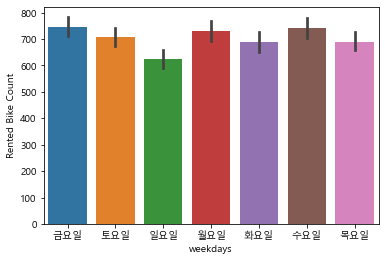

In [61]:
# (5) 위의 결과를 시각화
sns.barplot(x='weekdays',y='Rented Bike Count',data=bike)

<AxesSubplot:xlabel='weekdays', ylabel='Rented Bike Count'>

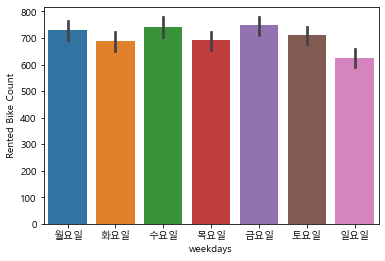

In [62]:
#금토일월? 순서변경해주자 
sns.barplot(x='weekdays',y='Rented Bike Count',data=bike,
           order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])

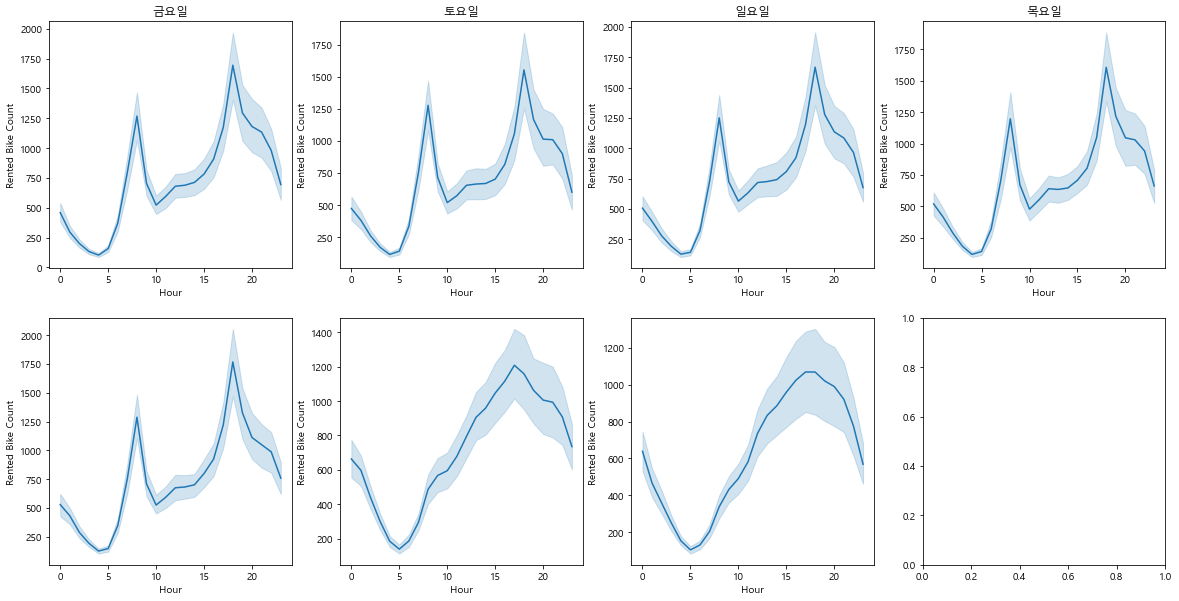

In [69]:
# (6) 요일별로 시간대별 그래프로 시각화
f,ax=plt.subplots(2,4,figsize=(20,10))

weekdays_list=['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

for i in range(7):
    sns.lineplot('Hour','Rented Bike Count',data=bike.loc[bike['weekdays']==weekdays_list[i]],
    ax=ax[i//4,i%4])
    
    ax[1//4,i%4].set_title(weekdays_list[i])